**Graphs: brief intro**

Graphs: a collection of vertices $V$ and edges $E$. The Edges contain pairs of vertices connecting vertices in $V$. 

Weights: each edge $e \in E$ has a *cost* or a *weight*. 

**Paths and costs**: given two vertices $v_1$ and $v_2$ in $V$, a path $p$ going from $v_1$ to $v_2$ is a collection of edges $(v_1,w_1), (w_1,w_2),...,(w_{k-1},w_k),(w_k,v_2)$ connecting $v_1$ to $v_2$. The cost of a path is given by the **sum of all weights of the edges making that path**.

![alt text](Example_Graph1.svg "Graph Example")


**Exercise 1** Indicate three paths linking vertices $C$ and $D$ in the graph illustrated above. Compute the associated costs.

Given a path and two vertices $A,B$ connected by at least a path the following problem becomes relevant. 

**Minimal cost path connecting two vertices**: Find the minimum cost for a path connecting two vertices $A$ and $B$.

**Exercise 2** By direct inspection, determine the minimum cost of a path from $C$ to $D$ in the graph illustrated above. 




**Dijkstra's Algorithm**

It is of interest to be able to compute and determine optimal paths in graphs. Dijkstra's algorithm provides a solution to this problem. Applications of this algorithm include:

- route planning: finding an optimal transportation plan in a road network
- shortest path in IP routing
- robotic path planning

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

**Algorithm Outline**: the graph $G$ is given (list of nodes, list of edges or node connections, list of weights associated to each edge).

1. Create a set of all unvisited nodes: the unvisited set.
2. Assign to every node a distance from the start value. It is initially zero for the start node and `infinity` for the other nodes.
3. From the unvisited set select the one with the smallest finite distance. If this is the **target** node then stop and mark it as the **current node**.
4. For the **current node** consider all its **unvisited neighbors** and update their distances through the current node. If new distances are smaller than the value of the current node, update this value.
5. After considering all unvisited neighbors of the current node, remove it from the  unvisited set. A visited node is never re-checked.
6. Once this procedure finishes, every visited node contains the shortest distance from the starting node.

</div>

**Exercise 3** Apply Dijkstra's algorithm to the graph indicated in the figure. Consider $D$ as the **starting node**  and $F$ as the **target node**.

![alt text](Example_Graph1.svg "Graph Example")


<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

**Implementation** Observe the implementation below and try to understand it.

a) The Graph is an object having multiple fields:
- adjacency matrix
- size
- vertex data 

b) There are multiple methods
- `add_edge` allows adding an edge with a corresponding weight
- `add_vertex_data` adds data to a vertex
- `dijkstra` runs the Dijkstra algortithm from a starting node

c) Read the code from the `dijkstra` method and verify that it performs the Dijkstra algorithm on the given graph, starting from the chosen original node.

</div>

In [3]:
class Graph:
    def __init__(self, size):
        self.adj_matrix = [[0] * size for _ in range(size)]
        self.size = size
        self.vertex_data = [''] * size

    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.adj_matrix[u][v] = weight
            self.adj_matrix[v][u] = weight  # For undirected graph

    def add_vertex_data(self, vertex, data):
        if 0 <= vertex < self.size:
            self.vertex_data[vertex] = data

    def dijkstra(self, start_vertex_data):
        start_vertex = self.vertex_data.index(start_vertex_data)
        distances = [float('inf')] * self.size
        distances[start_vertex] = 0
        visited = [False] * self.size

        for _ in range(self.size):
            min_distance = float('inf')
            u = None
            for i in range(self.size):
                if not visited[i] and distances[i] < min_distance:
                    min_distance = distances[i]
                    u = i

            if u is None:
                break

            visited[u] = True

            for v in range(self.size):
                if self.adj_matrix[u][v] != 0 and not visited[v]:
                    alt = distances[u] + self.adj_matrix[u][v]
                    if alt < distances[v]:
                        distances[v] = alt

        return distances

In [4]:
g = Graph(7)

g.add_vertex_data(0, 'A')
g.add_vertex_data(1, 'B')
g.add_vertex_data(2, 'C')
g.add_vertex_data(3, 'D')
g.add_vertex_data(4, 'E')
g.add_vertex_data(5, 'F')
g.add_vertex_data(6, 'G')

g.add_edge(3, 0, 4)  # D - A, weight 5
g.add_edge(3, 4, 2)  # D - E, weight 2
g.add_edge(0, 2, 3)  # A - C, weight 3
g.add_edge(0, 4, 4)  # A - E, weight 4
g.add_edge(4, 2, 4)  # E - C, weight 4
g.add_edge(4, 6, 5)  # E - G, weight 5
g.add_edge(2, 5, 5)  # C - F, weight 5
g.add_edge(2, 1, 2)  # C - B, weight 2
g.add_edge(1, 5, 2)  # B - F, weight 2
g.add_edge(6, 5, 5)  # G - F, weight 5

# Dijkstra's algorithm from D to all vertices
print("\nDijkstra's Algorithm starting from vertex D:")
distances = g.dijkstra('D')
for i, d in enumerate(distances):
    print(f"Distance from D to {g.vertex_data[i]}: {d}")


Dijkstra's Algorithm starting from vertex D:
Distance from D to A: 4
Distance from D to B: 8
Distance from D to C: 6
Distance from D to D: 0
Distance from D to E: 2
Distance from D to F: 10
Distance from D to G: 7


[[0, 0, 3, 4, 4, 0, 0], [0, 0, 2, 0, 0, 2, 0], [3, 2, 0, 0, 4, 5, 0], [4, 0, 0, 0, 2, 0, 0], [4, 0, 4, 2, 0, 0, 5], [0, 2, 5, 0, 0, 0, 5], [0, 0, 0, 0, 5, 5, 0]]
[[0 0 3 4 4 0 0]
 [0 0 2 0 0 2 0]
 [3 2 0 0 4 5 0]
 [4 0 0 0 2 0 0]
 [4 0 4 2 0 0 5]
 [0 2 5 0 0 0 5]
 [0 0 0 0 5 5 0]]


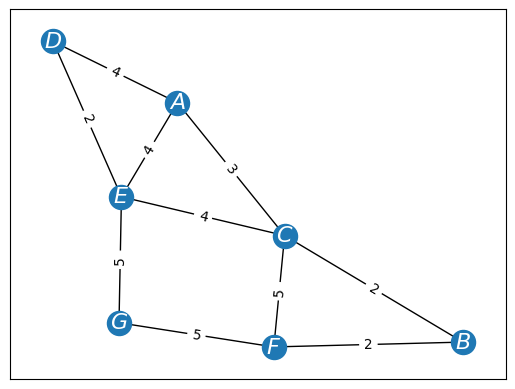

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

print(g.adj_matrix)
Mat = np.array(g.adj_matrix)
print(Mat)
rows, cols = np.where(Mat != 0)
gr = nx.Graph()

for i in range(0,len(rows)):
    weights[i] = Mat[rows[i],cols[i]]
    gr.add_edges_from([(rows[i],cols[i])],weight=weights[i])

pos=nx.spring_layout(gr) # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(gr,pos,with_labels=False)
elabels = nx.get_edge_attributes(gr,'weight')
nx.draw_networkx_edge_labels(gr,pos,edge_labels=elabels)
labels = {}
labels[0] = r"$A$"
labels[1] = r"$B$"
labels[2] = r"$C$"
labels[3] = r"$D$"
labels[4] = r"$E$"
labels[5] = r"$F$"
labels[6] = r"$G$"
labels = nx.draw_networkx_labels(gr, pos,labels,font_size=16,font_color='white')
plt.show()

<div style="background-color:lightblue;margin:20px;padding:10px;border-radius:10px;border-width:2px;border-color:black;box-shadow:5px 5px">

**Exercise 4**  Run the previous algorithm on the graph described previously: (see image below)

![alt text](Example_Graph1.svg "Graph Example")

Check that the numerical algorithm gives the same answer as the one found by hand (The origin is $D$ and the target is $F$).

</div>

**Additional exercises**

1. Project Euler, Problem 18: https://projecteuler.net/problem=18
- No need to create graph: the source node is the top, unvisited neighbors are always the two numbers directly below. A dynamical programming solution can also be given, but may be more costly.

3. Project Euler, problem 81: https://projecteuler.net/problem=81   
- there is no need to create a graph, just apply Dijkstra's algorithm on the matrix, observing the unvisited neighbors of a current element

3. Project Euler, problem 82: https://projecteuler.net/problem=82
- note that the minimal distance from any element on the left column to any element of the right column needs to be computed. It is possible to run Dijkstra's algorithm for all starting nodes on the left and record the minimal path length.
- Problem 83 from Project Euler adds another complication
